In [1]:
!nvidia-smi

Thu Feb 13 17:46:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
Home=os.getcwd()
Home

'/content'

In [3]:
!pip install -q supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 8.9 MB/s eta 0:00:00


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.4 MB/s eta 0:00:00


In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights


total 408M
-rw-r--r-- 1 root root  80M May 23  2024 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23  2024 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23  2024 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23  2024 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23  2024 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23  2024 yolov10x.pt


/content/{HOME}


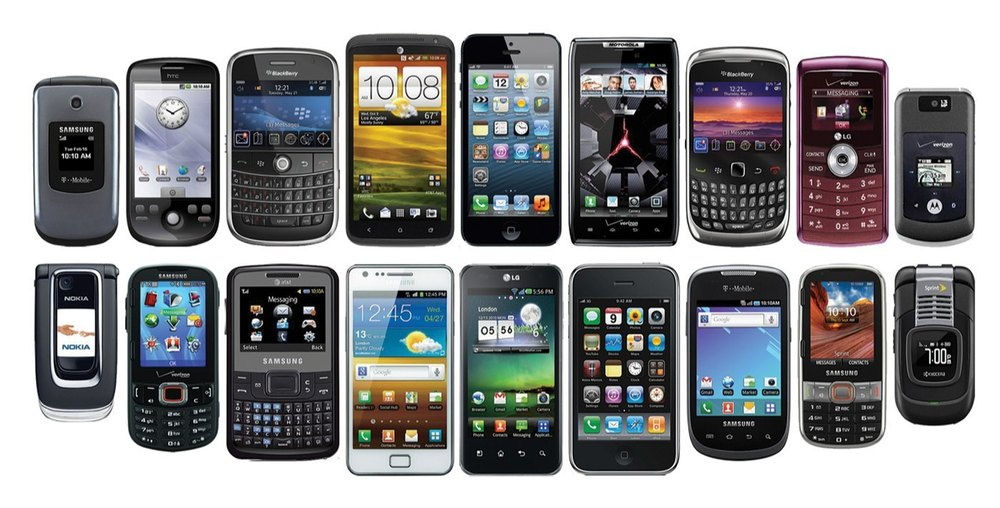

In [6]:
  from IPython.display import display, Image
  %cd {HOME}
  Image(filename='/content/sample.jpg',height=600)

In [7]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/{HOME}/weights/yolov10n.pt source=/content/sample.jpg

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [8]:
from ultralytics import YOLOv10
model=YOLOv10('/content/{HOME}/weights/yolov10n.pt')
Results = model(source='/content/sample.jpg', conf=0.25)



/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



image 1/1 /content/sample.jpg: 352x640 3 65s, 16 67s, 50.8ms
Speed: 2.8ms preprocess, 50.8ms inference, 114.8ms postprocess per image at shape (1, 3, 352, 640)


In [9]:
print(Results[0].boxes.xyxy)
print(Results[0].boxes.conf)
print(Results[0].boxes.cls)

tensor([[343.4018,  32.4779, 459.0688, 245.7538],
        [225.4717,  47.2083, 340.3410, 244.6372],
        [687.4617, 266.5551, 792.5739, 462.3911],
        [685.3547,  45.2140, 792.4974, 246.7184],
        [797.4857, 265.9465, 887.3001, 449.9152],
        [125.6034,  56.8421, 220.9624, 247.2912],
        [459.9953,  32.0240, 562.4003, 247.7219],
        [ 31.6448,  75.6260, 121.3990, 245.7921],
        [567.4669,  36.9354, 680.5889, 245.9335],
        [125.1297, 264.9029, 220.4521, 454.0953],
        [ 33.6567, 263.4723, 118.7082, 420.2294],
        [794.7090,  54.8901, 889.2975, 249.1414],
        [890.3866,  88.8725, 976.2958, 242.2713],
        [459.1269, 264.1353, 562.8088, 478.2911],
        [224.4693, 264.0781, 340.4113, 462.2863],
        [343.9126, 264.8747, 458.1067, 478.8081],
        [569.6915, 263.6402, 680.0701, 476.5401],
        [892.2642, 263.5292, 976.1906, 425.1106],
        [459.1269, 264.1353, 562.8088, 478.2911]], device='cuda:0')
tensor([0.8256, 0.8165, 0.8088, 


0: 352x640 3 65s, 16 67s, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


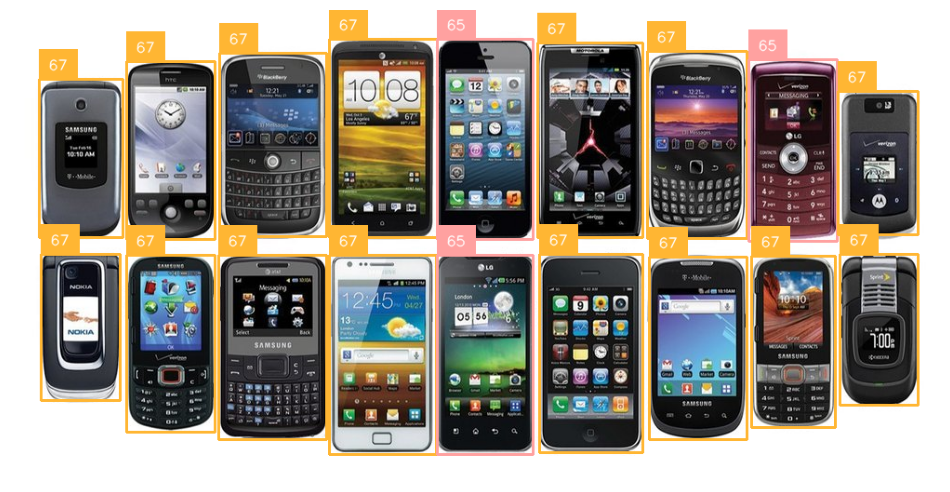

In [10]:
import cv2
import supervision as sv
from ultralytics import YOLOv10
model=YOLOv10('/content/{HOME}/weights/yolov10n.pt')
image=cv2.imread(f'/content/sample.jpg')
Results=model(image)[0]
detections=sv.Detections.from_ultralytics(Results)

bounding_box_annotator=sv.BoundingBoxAnnotator()
label_annotator=sv.LabelAnnotator()
annotated_image=bounding_box_annotator.annotate(scene=image,detections=detections)
annotated_image=label_annotator.annotate(scene=annotated_image,detections=detections)
sv.plot_image(annotated_image)

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zgGSjZg1oeIU8kyvK278")
project = rf.workspace("hope-ld7gz").project("object-detection-3nyty")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to object-detection-1 in yolov8:: 100%|██████████| 9816/9816 [00:02<00:00, 4618.35it/s]


In [4]:
import os
Home=os.getcwd()
%cd {Home}

/content


In [3]:
%cd {Home}
!yolo task=detect mode=train epochs=25 batch=32 plots=True \
model= {HOME}/weights/yolov10n.pt \
data= /content/object-detection-1/data.yaml

/content
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New h